## Demands and time
This code is for vidualize the relationship between the time and the demand

In [43]:
"""
    Dependencies
"""
import pandas as pd
import numpy as np
import datetime
from sklearn import mixture
import matplotlib.pyplot as plt

[]


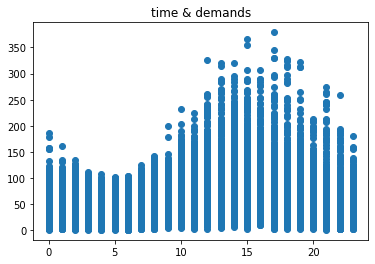

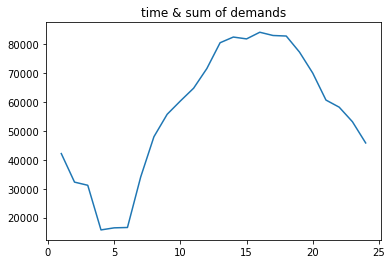

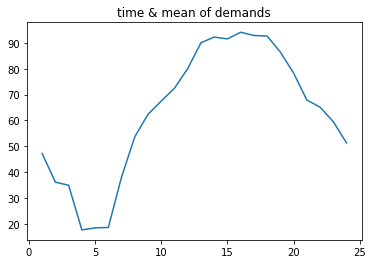

In [44]:
"""
    Read the file and implement the buckets
"""
buckets = [[]]*24
bucket_sizes = []
bucket_means = []
df = pd.read_csv('train_E1GspfA.csv')
print(bucket_sizes)
x = df['hour']
y = df['demand']
z = df['date']
z = z.drop_duplicates();

# fill in the buckets
for i in range(0, len(buckets)):
    buckets[i] = (df.loc[df['hour'] == i])['demand']
    bucket_sizes.append(np.sum(buckets[i]))
    bucket_means.append(np.sum(buckets[i])/len(z))

# show the distribution of the demands
plt.scatter(x, y)
plt.title('time & demands')
plt.show()

plt.plot(np.arange(1, 25, 1), bucket_sizes)
plt.title('time & sum of demands')
plt.show()

plt.plot(np.arange(1, 25, 1), bucket_means)
plt.title('time & mean of demands')
plt.show()

# visualize the distribution
def drawBuckets(buckets):
    for i in range(0, len(buckets)):
        x = np.arange(0, buckets[i].shape[0], 1)
        y = buckets[i]
        print(x.shape)
        print(y.shape)
        plt.scatter(x, y)
        plt.show()

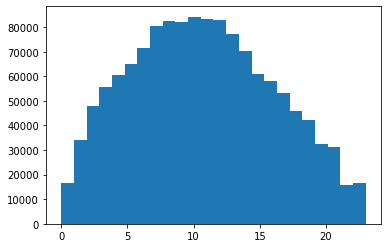

In [45]:
"""
    Use the guassian mixture model to model the distribution
"""
data = []
for i in range(0,len(bucket_sizes)):
    for j in range(0, bucket_sizes[i]):
        data.append((i+19)%24)

# plt the data
plt.hist(data, bins=24)
plt.show()

# get the data distribution
data = np.array(data).reshape((-1,1))

def fitGMM(data, components):
    gmm = mixture.BayesianGaussianMixture(
        n_components=components
    )
    gmm.fit(data)
    print(gmm.means_)
    print(gmm.covariances_)
    return gmm

In [46]:
# print the gmm distribution
import scipy.stats as stats

def visualizeGMM(gmm, data):
    means = gmm.means_
    vars = gmm.covariances_
    weights = gmm.weights_
    x = np.linspace(0, 24, num=100)
    y = np.zeros(x.shape)
    for i in range(0, weights.shape[0]):
        y += weights[i]*stats.norm.pdf(x, means[i], np.sqrt(vars[i]))[0]

    print(weights.shape[0])
    plt.plot(x, y, label = 'predicted distribution')
    plt.legend()
    plt.show()

    plt.plot(x, y*len(data), label = 'predicted distribution')
    plt.hist(data, bins=24, label='empirical distribution')
    plt.legend()
    plt.show()

C:\Users\11957\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


[[16.14003147]
 [ 6.848423  ]
 [ 2.32149651]
 [11.52291869]
 [20.68819017]]
[[[5.18926347]]

 [[5.04791905]]

 [[1.87953003]]

 [[3.95500505]]

 [[2.31906548]]]
5


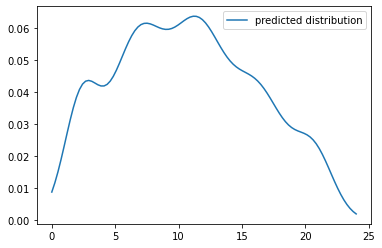

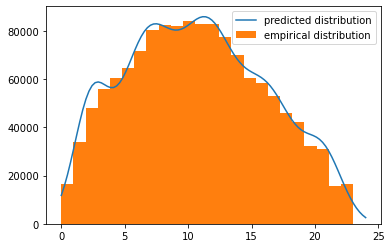

In [49]:
"""
    get the model
"""
# for i in range(1, 6):
#     visualizeGMM(fitGMM(data, i))
gmm = fitGMM(data, 5)
visualizeGMM(gmm, data)

[0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1]


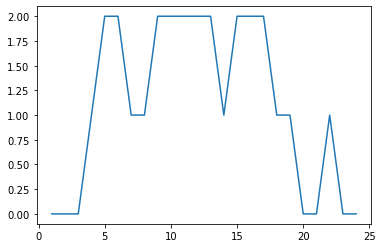

In [80]:
# test on the testing set
# it is quite useless, please igonore
test_set = pd.read_csv('test_import.csv')
test_buckets = [[]]*24
# fill in the buckets
for i in range(0, len(test_buckets)):
    test_buckets[i] = (test_set.loc[df['hour'] == i])['demand'].shape[0]
print(test_buckets)
new_data = [test_buckets[(i+5)%24] for i in range(0, 24)]

plt.plot(np.arange(1, 25, 1), new_data)
plt.show()